In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df=pd.read_excel('Actual Data (230).xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,جنس,سن,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,...,نبض,دیابت,سیگار,درد قفسه سینه,سابقه تنگی نفس,سابقه بیماری قلبی,سابقه فامیلی بیماری قلبی,سابقه فشار خون,تعداد روزهای بستری,C
0,1,زن,58,110.0,173.0,75.0,67.0,91.0,19.0,13.5,...,78.0,0.0,0.0,0.0,0,0,1,0,1,4
1,2,زن,65,100.0,200.0,199.0,41.0,119.2,20.0,12.2,...,88.0,1.0,0.0,0.0,0,0,1,0,6,3
2,3,مرد,77,70.0,130.0,104.0,60.0,NaN,15.0,14.0,...,69.0,0.0,0.0,0.0,0,1,1,0,10,4
3,4,زن,75,108.0,NaN,NaN,NaN,NaN,19.0,12.2,...,70.0,0.0,1.0,0.0,0,1,0,0,4,2
4,5,زن,80,85.0,120.0,72.0,42.0,63.6,17.0,13.7,...,150.0,0.0,1.0,0.0,0,0,0,0,5,2


In [3]:
df.shape

(230, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'جنس', 'سن', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB',
       'Hb', 'PT', 'PTT', 'Trop i', 'فشار خون سیستولیک', 'فشار خون دیاستولیک',
       'نبض', 'دیابت', 'سیگار', 'درد قفسه سینه', 'سابقه تنگی نفس',
       'سابقه بیماری قلبی', 'سابقه فامیلی بیماری قلبی', 'سابقه فشار خون',
       'تعداد روزهای بستری', 'C'],
      dtype='object')

In [5]:
df=df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,جنس,سن,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,...,نبض,دیابت,سیگار,درد قفسه سینه,سابقه تنگی نفس,سابقه بیماری قلبی,سابقه فامیلی بیماری قلبی,سابقه فشار خون,تعداد روزهای بستری,C
0,زن,58,110.0,173.0,75.0,67.0,91.0,19.0,13.5,12.0,...,78.0,0.0,0.0,0.0,0,0,1,0,1,4
1,زن,65,100.0,200.0,199.0,41.0,119.2,20.0,12.2,12.0,...,88.0,1.0,0.0,0.0,0,0,1,0,6,3
2,مرد,77,70.0,130.0,104.0,60.0,NaN,15.0,14.0,30.0,...,69.0,0.0,0.0,0.0,0,1,1,0,10,4
3,زن,75,108.0,NaN,NaN,NaN,NaN,19.0,12.2,12.6,...,70.0,0.0,1.0,0.0,0,1,0,0,4,2
4,زن,80,85.0,120.0,72.0,42.0,63.6,17.0,13.7,12.0,...,150.0,0.0,1.0,0.0,0,0,0,0,5,2


In [7]:
df=df.rename(columns={'جنس': 'Sex',
                       'سن': 'Age',
                       'C':'Target',
                       'تعداد روزهای بستری':'Number of hospitalization days',
                       'نبض':'Heart rate',
                       'دیابت':'Diabetes',
                       'فشار خون سیستولیک':'BPs',
                       'فشار خون دیاستولیک':'BPd',
                      'درد قفسه سینه':'Chest pain',
                      'سیگار':'Smoke',
                      'سابقه تنگی نفس':'History of shortness of breath',
                      'سابقه بیماری قلبی':'History of heart disease',
                      'سابقه فامیلی بیماری قلبی':'Family history of heart disease',
                      'سابقه فشار خون':'History of high blood pressure'})
df.head()

,Sex,Age,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,...,Heart rate,Diabetes,Smoke,Chest pain,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target
0,زن,58,110.0,173.0,75.0,67.0,91.0,19.0,13.5,12.0,...,78.0,0.0,0.0,0.0,0,0,1,0,1,4
1,زن,65,100.0,200.0,199.0,41.0,119.2,20.0,12.2,12.0,...,88.0,1.0,0.0,0.0,0,0,1,0,6,3
2,مرد,77,70.0,130.0,104.0,60.0,NaN,15.0,14.0,30.0,...,69.0,0.0,0.0,0.0,0,1,1,0,10,4
3,زن,75,108.0,NaN,NaN,NaN,NaN,19.0,12.2,12.6,...,70.0,0.0,1.0,0.0,0,1,0,0,4,2
4,زن,80,85.0,120.0,72.0,42.0,63.6,17.0,13.7,12.0,...,150.0,0.0,1.0,0.0,0,0,0,0,5,2


In [8]:
df.dtypes

Sex                                 object
Age                                  int64
FBS                                float64
CHOL                               float64
TG                                 float64
HDL                                float64
LDL                                float64
CPKMB                              float64
Hb                                 float64
PT                                 float64
PTT                                float64
Trop i                             float64
BPs                                float64
BPd                                float64
Heart rate                         float64
Diabetes                           float64
Smoke                              float64
Chest pain                         float64
History of shortness of breath       int64
History of heart disease             int64
Family history of heart disease      int64
History of high blood pressure       int64
Number of hospitalization days       int64
Target     

In [9]:
df.isnull().sum()

Sex                                 0
Age                                 0
FBS                                24
CHOL                               25
TG                                 26
HDL                                29
LDL                                62
CPKMB                              15
Hb                                 10
PT                                 21
PTT                                17
Trop i                              5
BPs                                 2
BPd                                 2
Heart rate                          2
Diabetes                            1
Smoke                               1
Chest pain                          1
History of shortness of breath      0
History of heart disease            0
Family history of heart disease     0
History of high blood pressure      0
Number of hospitalization days      0
Target                              0
dtype: int64

In [10]:
df.describe()

,Age,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,PTT,...,Heart rate,Diabetes,Smoke,Chest pain,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target
count,230.000000,206.000000,205.000000,204.000000,201.000000,168.000000,215.000000,220.000000,209.000000,213.000000,...,228.000000,229.000000,229.000000,229.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,62.465217,113.902913,169.360976,141.132353,48.312438,97.833333,23.465116,13.702273,13.147368,35.399061,...,74.364035,0.043668,0.244541,0.069869,0.143478,0.539130,0.226087,0.060870,4.100000,3.400000
std,13.175209,47.669495,40.737400,84.889016,12.142203,47.222047,37.555286,1.910974,3.556495,9.039504,...,15.443914,0.204803,0.430757,0.255485,0.351324,0.499554,0.419208,0.239612,2.830511,1.440524
min,23.000000,62.000000,88.000000,38.000000,26.000000,14.000000,5.000000,5.600000,10.000000,30.000000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,54.000000,85.000000,140.000000,81.750000,40.000000,71.200000,12.000000,12.600000,12.000000,30.000000,...,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.250000,2.000000
50%,62.000000,99.500000,167.000000,120.000000,47.000000,92.000000,15.000000,13.800000,12.000000,34.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,3.500000
75%,73.000000,121.500000,194.000000,170.000000,55.000000,114.000000,20.000000,14.700000,13.200000,38.000000,...,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.000000
max,94.000000,318.000000,290.000000,550.000000,98.000000,464.000000,347.000000,21.400000,50.000000,130.000000,...,160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

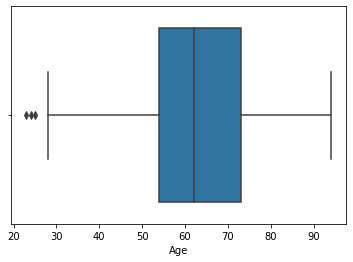

In [11]:
sns.boxplot(df.Age)

/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FBS'>

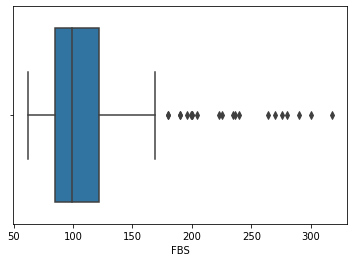

In [12]:
sns.boxplot(df.FBS)

/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHOL'>

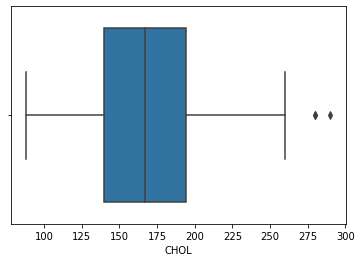

In [13]:
sns.boxplot(df.CHOL)

/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TG'>

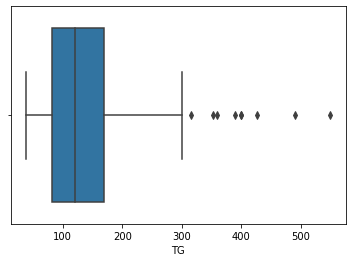

In [14]:
sns.boxplot(df.TG)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HDL'>

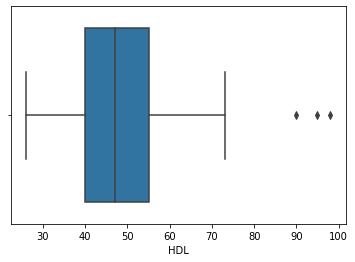

In [15]:
sns.boxplot(df.HDL)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LDL'>

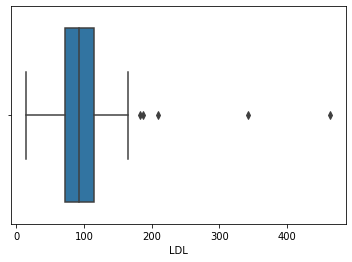

In [16]:
sns.boxplot(df.LDL)


In [17]:
sns.boxplot(df.CPK)


AttributeError: 'DataFrame' object has no attribute 'CPK'

In [ ]:
sns.boxplot(df.CPKMB)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hb'>

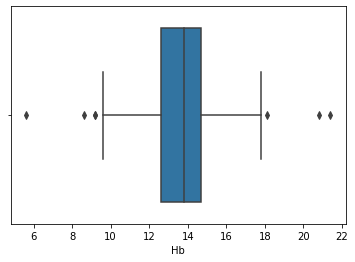

In [18]:
sns.boxplot(df.Hb)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PT'>

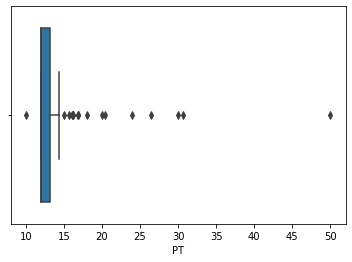

In [19]:
sns.boxplot(df.PT)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTT'>

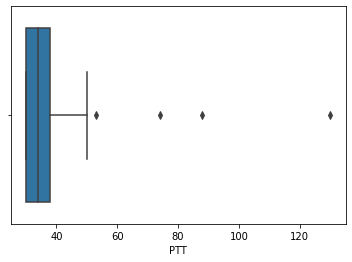

In [20]:
sns.boxplot(df.PTT)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BPs'>

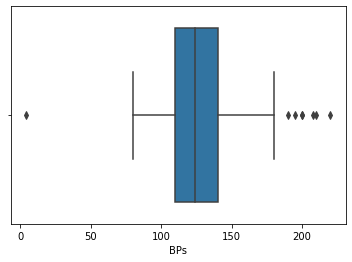

In [21]:
sns.boxplot(df.BPs)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BPd'>

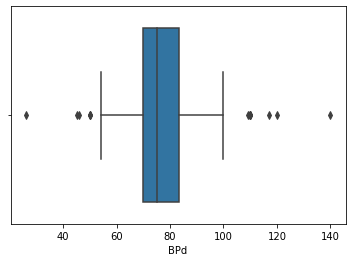

In [22]:
sns.boxplot(df.BPd)


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart rate'>

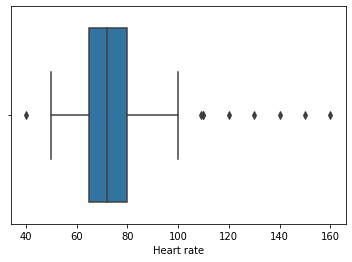

In [23]:
sns.boxplot(df['Heart rate'])


/home/amin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of hospitalization days'>

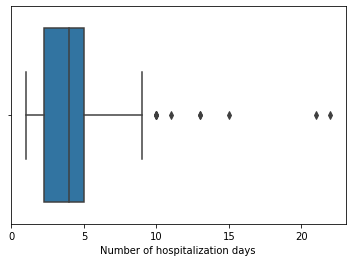

In [24]:
sns.boxplot(df['Number of hospitalization days'])

<AxesSubplot:>

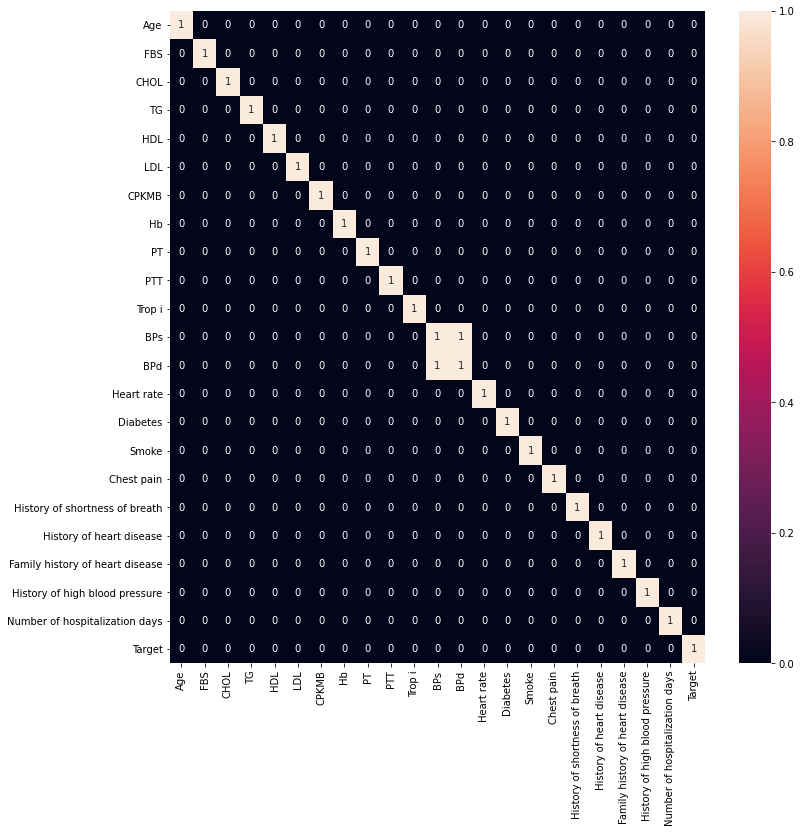

In [25]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr()>0.7, annot=True)
##dfdemo.corr()>0.7

In [26]:
df['Sex'].value_counts()

زن      118
مرد     111
مرد       1
Name: Sex, dtype: int64

In [27]:
df['Trop i'].value_counts()

0.0    210
1.0     15
Name: Trop i, dtype: int64

In [28]:
df['Diabetes'].value_counts()

0.0    219
1.0     10
Name: Diabetes, dtype: int64

In [29]:
df['Smoke'].value_counts()

0.0    173
1.0     56
Name: Smoke, dtype: int64

In [30]:
df['Chest pain'].value_counts()

0.0    213
1.0     16
Name: Chest pain, dtype: int64

In [31]:
df['History of shortness of breath'].value_counts()

0    197
1     33
Name: History of shortness of breath, dtype: int64

In [32]:
df['History of heart disease'].value_counts()

1    124
0    106
Name: History of heart disease, dtype: int64

In [33]:
df['Family history of heart disease'].value_counts()

0    178
1     52
Name: Family history of heart disease, dtype: int64

In [34]:
df['History of high blood pressure'].value_counts()

0    216
1     14
Name: History of high blood pressure, dtype: int64

In [35]:
df['Number of hospitalization days'].value_counts()

3     55
4     41
5     32
2     31
1     27
6     18
7     10
10     4
9      4
8      2
13     2
11     1
22     1
21     1
15     1
Name: Number of hospitalization days, dtype: int64

In [36]:
df['Target'].value_counts()

5    81
2    54
3    36
4    34
1    25
Name: Target, dtype: int64

In [37]:
df=df.drop_duplicates()
df.shape

(230, 24)

In [38]:
df['Sex'][df['Sex']=='زن']=0
df['Sex'][df['Sex']=='مرد']=1
df['Sex'][df['Sex']=='مرد ']=1

/tmp/ipykernel_31099/3033149293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][df['Sex']=='زن']=0
/tmp/ipykernel_31099/3033149293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][df['Sex']=='مرد']=1
/tmp/ipykernel_31099/3033149293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][df['Sex']=='مرد ']=1


In [39]:
df.head()

,Sex,Age,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,...,Heart rate,Diabetes,Smoke,Chest pain,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target
0,0,58,110.0,173.0,75.0,67.0,91.0,19.0,13.5,12.0,...,78.0,0.0,0.0,0.0,0,0,1,0,1,4
1,0,65,100.0,200.0,199.0,41.0,119.2,20.0,12.2,12.0,...,88.0,1.0,0.0,0.0,0,0,1,0,6,3
2,1,77,70.0,130.0,104.0,60.0,NaN,15.0,14.0,30.0,...,69.0,0.0,0.0,0.0,0,1,1,0,10,4
3,0,75,108.0,NaN,NaN,NaN,NaN,19.0,12.2,12.6,...,70.0,0.0,1.0,0.0,0,1,0,0,4,2
4,0,80,85.0,120.0,72.0,42.0,63.6,17.0,13.7,12.0,...,150.0,0.0,1.0,0.0,0,0,0,0,5,2


In [40]:
df.dtypes

Sex                                 object
Age                                  int64
FBS                                float64
CHOL                               float64
TG                                 float64
HDL                                float64
LDL                                float64
CPKMB                              float64
Hb                                 float64
PT                                 float64
PTT                                float64
Trop i                             float64
BPs                                float64
BPd                                float64
Heart rate                         float64
Diabetes                           float64
Smoke                              float64
Chest pain                         float64
History of shortness of breath       int64
History of heart disease             int64
Family history of heart disease      int64
History of high blood pressure       int64
Number of hospitalization days       int64
Target     

In [41]:
df['Sex']=df['Sex'].astype('int64')

In [42]:
df.dtypes

Sex                                  int64
Age                                  int64
FBS                                float64
CHOL                               float64
TG                                 float64
HDL                                float64
LDL                                float64
CPKMB                              float64
Hb                                 float64
PT                                 float64
PTT                                float64
Trop i                             float64
BPs                                float64
BPd                                float64
Heart rate                         float64
Diabetes                           float64
Smoke                              float64
Chest pain                         float64
History of shortness of breath       int64
History of heart disease             int64
Family history of heart disease      int64
History of high blood pressure       int64
Number of hospitalization days       int64
Target     

In [43]:
df.Sex.value_counts()

0    118
1    112
Name: Sex, dtype: int64

In [44]:
X=df.drop('Target', axis=1)
y=df.Target

In [45]:
X.head()

,Sex,Age,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,...,BPd,Heart rate,Diabetes,Smoke,Chest pain,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days
0,0,58,110.0,173.0,75.0,67.0,91.0,19.0,13.5,12.0,...,69.0,78.0,0.0,0.0,0.0,0,0,1,0,1
1,0,65,100.0,200.0,199.0,41.0,119.2,20.0,12.2,12.0,...,70.0,88.0,1.0,0.0,0.0,0,0,1,0,6
2,1,77,70.0,130.0,104.0,60.0,NaN,15.0,14.0,30.0,...,60.0,69.0,0.0,0.0,0.0,0,1,1,0,10
3,0,75,108.0,NaN,NaN,NaN,NaN,19.0,12.2,12.6,...,80.0,70.0,0.0,1.0,0.0,0,1,0,0,4
4,0,80,85.0,120.0,72.0,42.0,63.6,17.0,13.7,12.0,...,93.0,150.0,0.0,1.0,0.0,0,0,0,0,5


In [46]:
messy_df=df

In [51]:
colnames=['FBS','CHOL','TG','HDL','LDL','CPKMB','Hb','PT','PTT','Trop i',
          'BPs','BPd','Heart rate','Diabetes','Smoke','Chest pain'] 

def  approach2_impute_metric(messy_df, metric, colnames):
    
    # Create X_df of predictor columns
    X_df = messy_df.drop(colnames, axis = 1)
    
    # Create Y_df of predicted columns
    Y_df = messy_df[colnames]
        
    # Create empty dataframes and list
    Y_pred_df = pd.DataFrame(columns=colnames)
    Y_missing_df = pd.DataFrame(columns=colnames)
    missing_list = []
    
    # Loop through all columns containing missing values
    for col in messy_df[colnames]:
    
        # Number of missing values in the column
        missing_count = messy_df[col].isnull().sum()
        
        # Separate train dataset which does not contain missing values
        messy_df_train = messy_df[~messy_df[col].isnull()]
        
        # Create X and Y within train dataset
        msg_cols_train_df = messy_df_train[col]
        messy_df_train = messy_df_train.drop(colnames, axis = 1)

        # Create test dataset, containing missing values in Y    
        messy_df_test = messy_df[messy_df[col].isnull()]
        
        # Separate X and Y in test dataset
        msg_cols_test_df = messy_df_test[col]
        messy_df_test = messy_df_test.drop(colnames,axis = 1)

        # Copy X_train and Y_train
        Y_train = msg_cols_train_df.copy()
        X_train = messy_df_train.copy()
        
        # Linear Regression model
        if metric == "Linear Regression":
            model = LinearRegression()
            model.fit(X_train,Y_train)
            print("R-squared value is: " + str(model.score(X_train, Y_train)))
          
        # Random Forests regression model
        elif metric == "Random Forests":
            model = RandomForestRegressor(n_estimators = 50 , oob_score = True, max_depth=10)
            model.fit(X_train,Y_train) 
                   
        X_test = messy_df_test.copy()
        
        # Predict Y_test values by passing X_test as input to the model
        Y_test = model.predict(X_test)
        
        Y_test_integer = pd.to_numeric(pd.Series(Y_test),downcast='integer')
        
        # Append predicted Y values to known Y values
        Y_complete = Y_train.append(Y_test_integer)
        Y_complete = Y_complete.reset_index(drop = True)
        
        # Update list of missing values
        missing_list.append(Y_test.tolist())
        
        Y_pred_df[col] = Y_complete
        Y_pred_df = Y_pred_df.reset_index(drop = True)
    
    # Create cleaned up dataframe
    clean_df = X_df.join(Y_pred_df)
    
    return clean_df,missing_list

In [52]:
df.isnull().sum()

Sex                                 0
Age                                 0
FBS                                24
CHOL                               25
TG                                 26
HDL                                29
LDL                                62
CPKMB                              15
Hb                                 10
PT                                 21
PTT                                17
Trop i                              5
BPs                                 2
BPd                                 2
Heart rate                          2
Diabetes                            1
Smoke                               1
Chest pain                          1
History of shortness of breath      0
History of heart disease            0
Family history of heart disease     0
History of high blood pressure      0
Number of hospitalization days      0
Target                              0
dtype: int64

In [53]:
# approach2_impute_metric(messy_df,"Random Forests", colnames)

In [54]:
cleanDF, mislist = approach2_impute_metric(messy_df,"Random Forests", colnames)

In [55]:
cleanDF.to_excel('Actual Data imputedMissinValue.xlsx', index=False)